Elon Musk has been trending lately, and we know his preferred social media to use is Twitter!
I want to look at his recent tweets and perform an Exploratory analysis to find out what he tweets the most

I will be using Tweepy(an open source Python package that gives access to Twitter API) and python to collect the data.

I will be using Spacy and NLTK to explore the data and Matplotlib to visualize the data

In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import time
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re 
import spacy
nlp = spacy.load('en_core_web_md')

[nltk_data] Downloading package punkt to /Users/Cos-Ibe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Cos-Ibe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NB: to replicate this, you need to register as a developer on twitter with elevated access.

I have also redacted sensitive data from the code.


In [2]:
# Assigning the approprite keys and token
consumer_key = "REDACTED"
consumer_secret = "REDACTED"
access_token = "REDACTED"
access_token_secret = "REDACTED"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

Elon Musk username "elonmusk" have been assigned to "username" variablel and the nuumber of tweets we want to extract (currently, the maximum tweepy can extract is 3200, so we set our max to 3200 last tweets)

In [19]:
username = 'ucosibe'
count = 3200

To extract the tweets, I first created an empty dataframe to be used to store the tweets as the come.
I created a query with the apporiate parameter and assigned it to tweets before pulling the information from his last 3200 tweets


In [20]:
df_user_tweets = pd.DataFrame()
try:     
    # Creation of query method using appropriate parameters
    tweets =    tweepy.Cursor(api.user_timeline,id=username, include_rts = False).items(count)
 
    
    # Pulling information from tweets iterable object and adding relevant tweet information in our data frame
    for tweet in tweets:
        df_user_tweets = df_user_tweets.append(
                          {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                     'Description': tweet.user._json['description'],
                           'Location': tweet.user._json['location'],
             'Followers Count': tweet.user._json['followers_count'],
                 'Friends Count': tweet.user._json['friends_count'],
               'Statuses Count': tweet.user._json['statuses_count'],
         'Profile Image Url': tweet.user._json['profile_image_url'],
                         }, ignore_index=True)
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

Unexpected parameter: id
/var/folders/fv/tglkwms162v96gy3n3wnby4r0000gp/T/ipykernel_92111/3786090017.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_user_tweets = df_user_tweets.append(
/var/folders/fv/tglkwms162v96gy3n3wnby4r0000gp/T/ipykernel_92111/3786090017.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_user_tweets = df_user_tweets.append(
/var/folders/fv/tglkwms162v96gy3n3wnby4r0000gp/T/ipykernel_92111/3786090017.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_user_tweets = df_user_tweets.append(
/var/folders/fv/tglkwms162v96gy3n3wnby4r0000gp/T/ipykernel_92111/3786090017.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

Checking the data frame to know if our tweets were pulled successfully

In [21]:
df_user_tweets.head()

,Created at,User ID,User Name,Text,Description,Location,Followers Count,Friends Count,Statuses Count,Profile Image Url
0,Wed May 18 11:49:08 +0000 2022,1526892638942777345,Mazi Uche,@bennie_baby1 @veekay8 @Morris_Monye Sha apply...,Data Scientist | Lil Wayne | Real Madrid,,463,1064,1284,http://pbs.twimg.com/profile_images/1408673250...
1,Wed May 18 11:48:44 +0000 2022,1526892541181927426,Mazi Uche,@MuyiwaWilliams_ New York 😬,Data Scientist | Lil Wayne | Real Madrid,,463,1064,1284,http://pbs.twimg.com/profile_images/1408673250...
2,Wed May 18 06:49:45 +0000 2022,1526817297456939008,Mazi Uche,@veekay8 @Morris_Monye I'm just interpreting. ...,Data Scientist | Lil Wayne | Real Madrid,,463,1064,1284,http://pbs.twimg.com/profile_images/1408673250...
3,Wed May 18 06:12:34 +0000 2022,1526807940342104064,Mazi Uche,@Morris_Monye I think he means. Someone not fa...,Data Scientist | Lil Wayne | Real Madrid,,463,1064,1284,http://pbs.twimg.com/profile_images/1408673250...
4,Tue May 17 23:53:46 +0000 2022,1526712613895294976,Mazi Uche,"@DeycallmiFaMe Since no kmd asked, they served...",Data Scientist | Lil Wayne | Real Madrid,,463,1064,1284,http://pbs.twimg.com/profile_images/1408673250...


In [22]:
df_user_tweets.shape

(1126, 10)

In [23]:
df_user_tweets.to_csv('my_tweets.csv')

In [24]:
df_user_tweets['Text']

0       @bennie_baby1 @veekay8 @Morris_Monye Sha apply...
1                             @MuyiwaWilliams_ New York 😬
2       @veekay8 @Morris_Monye I'm just interpreting. ...
3       @Morris_Monye I think he means. Someone not fa...
4       @DeycallmiFaMe Since no kmd asked, they served...
                              ...                        
1121    @KCultureWithNne I know how a mutual here was ...
1122    @KCultureWithNne People don't get that you nee...
1123                                    @Everdiva1 As in!
1124    @esthery_a He doesn't do random + tends to kno...
1125    @esthery_a What's your dad's number.. Asking f...
Name: Text, Length: 1126, dtype: object

In [25]:
df = df_user_tweets['Text']

In [26]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['@bennie_baby1', '@veekay8', '@Morris_Monye', 'Sha', 'apply', 'same', 'energy', 'to', 'burger', '@MuyiwaWilliams_', 'New', 'York', '😬', '@veekay8', '@Morris_Monye', "I'm", 'just', 'interpreting.', 'I', "don't", 'care', 'what', 'people', 'do', 'with', 'their', 'meal', 'lol', '@Morris_Monye', 'I', 'think', 'he', 'means.', 'Someone', 'not', 'familiar', 'with', 'the', 'culture', 'and', 'use', 'to', 'cutlery', 'used', 'her', 'hands...', 'So', 'why', 'Will', 'a', 'local', 'form', 'porsche', '@DeycallmiFaMe', 'Since', 'no', 'kmd', 'asked,', 'they', 'served', 'you', 'poop', 'too?', '@ToyosiGodwin', 'On', 'God.', 'Especially', 'when', 'you', 'are', 'just', 'starting', 'life.', 'If', 'na', 'twitter', 'for', 'android', 'you', 'get,', 'wear', 'am', 'with', 'p…', 'https://t.co/hbBoctiStd', '@MrOdanz', 'Oh', 'God', 'guy.', 'Kaka', 'was', 'world', 'class', 'too', 'even', 'Beckham', 'no', 'get', 'this', 'pr', '@_jennie1', 'https://t.co/hnMmrWbFZH', '@MastaPraise', '@_AsiwajuLerry', '🤣', '🤣', '🤣', '@M

In [27]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [29]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['benniebaby1',
 'veekay8',
 'morrismony',
 'sha',
 'appli',
 'same',
 'energi',
 'to',
 'burger',
 'muyiwawilliam',
 'new',
 'york',
 'veekay8',
 'morrismony',
 'im',
 'just',
 'interpret',
 'i',
 'dont',
 'care',
 'what',
 'peopl',
 'do',
 'with',
 'their',
 'meal',
 'lol',
 'morrismony',
 'i',
 'think',
 'he',
 'mean',
 'someon',
 'not',
 'familiar',
 'with',
 'the',
 'cultur',
 'and',
 'use',
 'to',
 'cutleri',
 'use',
 'her',
 'hand',
 'so',
 'whi',
 'will',
 'a',
 'local',
 'form',
 'porsch',
 'deycallmifam',
 'sinc',
 'no',
 'kmd',
 'ask',
 'they',
 'serv',
 'you',
 'poop',
 'too',
 'toyosigodwin',
 'on',
 'god',
 'especi',
 'when',
 'you',
 'are',
 'just',
 'start',
 'life',
 'if',
 'na',
 'twitter',
 'for',
 'android',
 'you',
 'get',
 'wear',
 'am',
 'with',
 'p',
 'httpstcohbboctistd',
 'mrodanz',
 'oh',
 'god',
 'guy',
 'kaka',
 'was',
 'world',
 'class',
 'too',
 'even',
 'beckham',
 'no',
 'get',
 'this',
 'pr',
 'jennie1',
 'httpstcohnmmrwbfzh',
 'mastaprais',
 'asiwajul

In [30]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['benniebaby1',
 'veekay8',
 'morrismony',
 'sha',
 'appli',
 'energi',
 'burger',
 'muyiwawilliam',
 'new',
 'york',
 'veekay8',
 'morrismony',
 'im',
 'interpret',
 'dont',
 'care',
 'peopl',
 'meal',
 'lol',
 'morrismony',
 'think',
 'mean',
 'someon',
 'familiar',
 'cultur',
 'use',
 'cutleri',
 'use',
 'hand',
 'whi',
 'local',
 'form',
 'porsch',
 'deycallmifam',
 'sinc',
 'kmd',
 'ask',
 'serv',
 'poop',
 'toyosigodwin',
 'god',
 'especi',
 'start',
 'life',
 'na',
 'twitter',
 'android',
 'wear',
 'p',
 'httpstcohbboctistd',
 'mrodanz',
 'oh',
 'god',
 'guy',
 'kaka',
 'world',
 'class',
 'beckham',
 'pr',
 'jennie1',
 'httpstcohnmmrwbfzh',
 'mastaprais',
 'asiwajulerri',
 'mastaprais',
 'asiwajulerri',
 'star',
 'mastaprais',
 'asiwajulerri',
 'jam',
 'kpop',
 'start',
 'mrodanz',
 'oh',
 'wow',
 'samsung',
 'run',
 'proprietari',
 'os',
 'justinnoble17',
 'mrodanz',
 'buy',
 'lg',
 'tv',
 '50',
 '70k',
 'buy',
 'mitv',
 'dongl',
 '15k',
 'boom',
 'android',
 'tv',
 'mrodanz',

In [31]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [32]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1805, 2: 458, 3: 235, 4: 117, 5: 75, 7: 41, 6: 35, 9: 32, 8: 22, 10: 15, ...})

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Cos-Ibe/miniforge3/envs/ds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


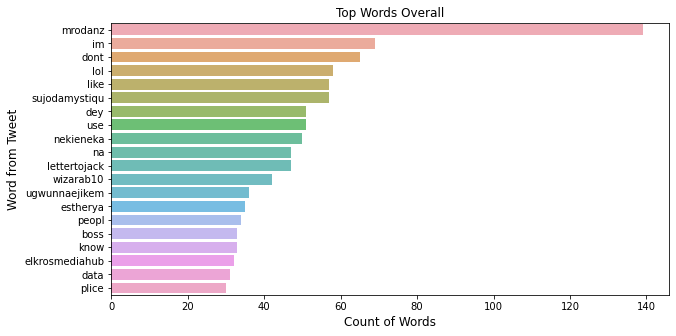

In [34]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()



In [35]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_md
nlp = en_core_web_md.load()

In [36]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [37]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


/Users/Cos-Ibe/miniforge3/envs/ds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


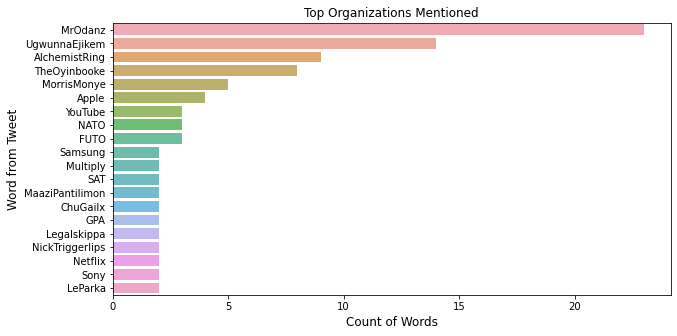

In [38]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [39]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


/Users/Cos-Ibe/miniforge3/envs/ds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


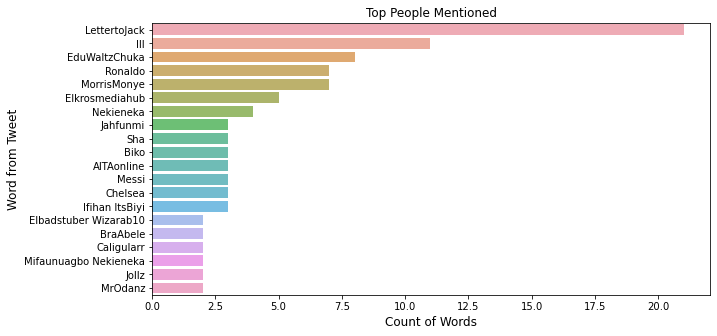

In [40]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()